In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [85]:
data = pd.read_csv(r'avocado.csv')

In [86]:
data.head(4)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany


### EDA :

In [87]:
#Let's drop the columns Unnamed: 0 and Date as it is not needed.

data.drop(['Unnamed: 0','Date'], axis= 1, inplace = True)

In [88]:
#lets check all the columns and data type of each.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


We See there are 3 string dtype, each columns has 18249 data in it and all has float64 datatype except for column year which has int datatype.

In [89]:
#Lets check for null values now

data.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

With the Observation we see that there are no null values in the dataset.

In [90]:
#Lets check how the data is distributed

data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


With the above we see how the data is distributed and see the mean, standard deviation, percentage of value falling under 25%,50%,75%, Min Value, Max Value of each column.

In [91]:
#Lets create a new column for other avacodes as 4046, 4225, 4770 are also included with others in the feature total volume.

data['Others'] = data['Total Volume'] - (data['4046']+ data['4225'] + data['4770'])

data.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Others
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,8696.87
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,9505.56


In [92]:
#Since now we have all types of avacadoes we can go ahead and drop the column, Total Volume from the database.

data.drop(['Total Volume'], axis = 1, inplace = True)

In [93]:
#Lets check the shape of dataset now.

data.shape

(18249, 12)

We see that there are 18249 rows and 12 columns in the dataset.

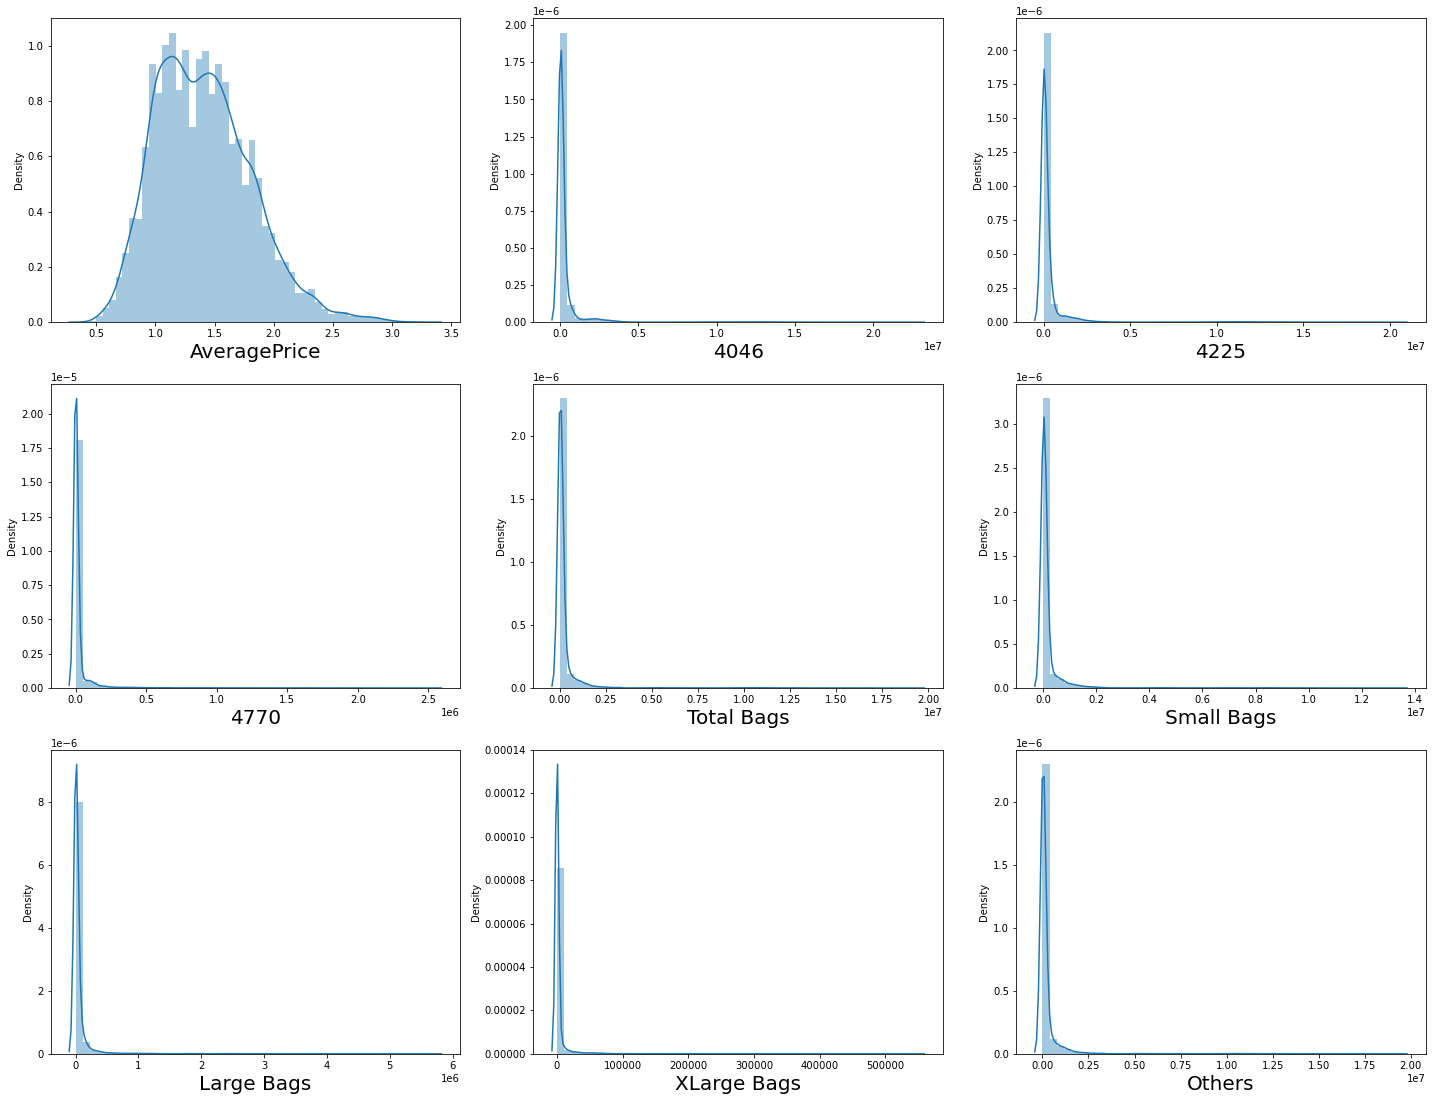

In [94]:
#Plotting dist plot to check for skewness

#lets drop the year column first as it won't be needed.

df = data.drop(['year', 'type', 'region' ], axis = 1)

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=13:
        ax=plt.subplot(5,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize= 20)
        
    plotnumber+=1
plt.tight_layout()    

In [95]:
data.skew()

AveragePrice     0.580303
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Others           9.756055
dtype: float64

With the above plots and method it looks like there is lot of skewness in all the features.

In [96]:
#We will proceed ahead and check the relation of each feature with the label to see if they are positively related or not.

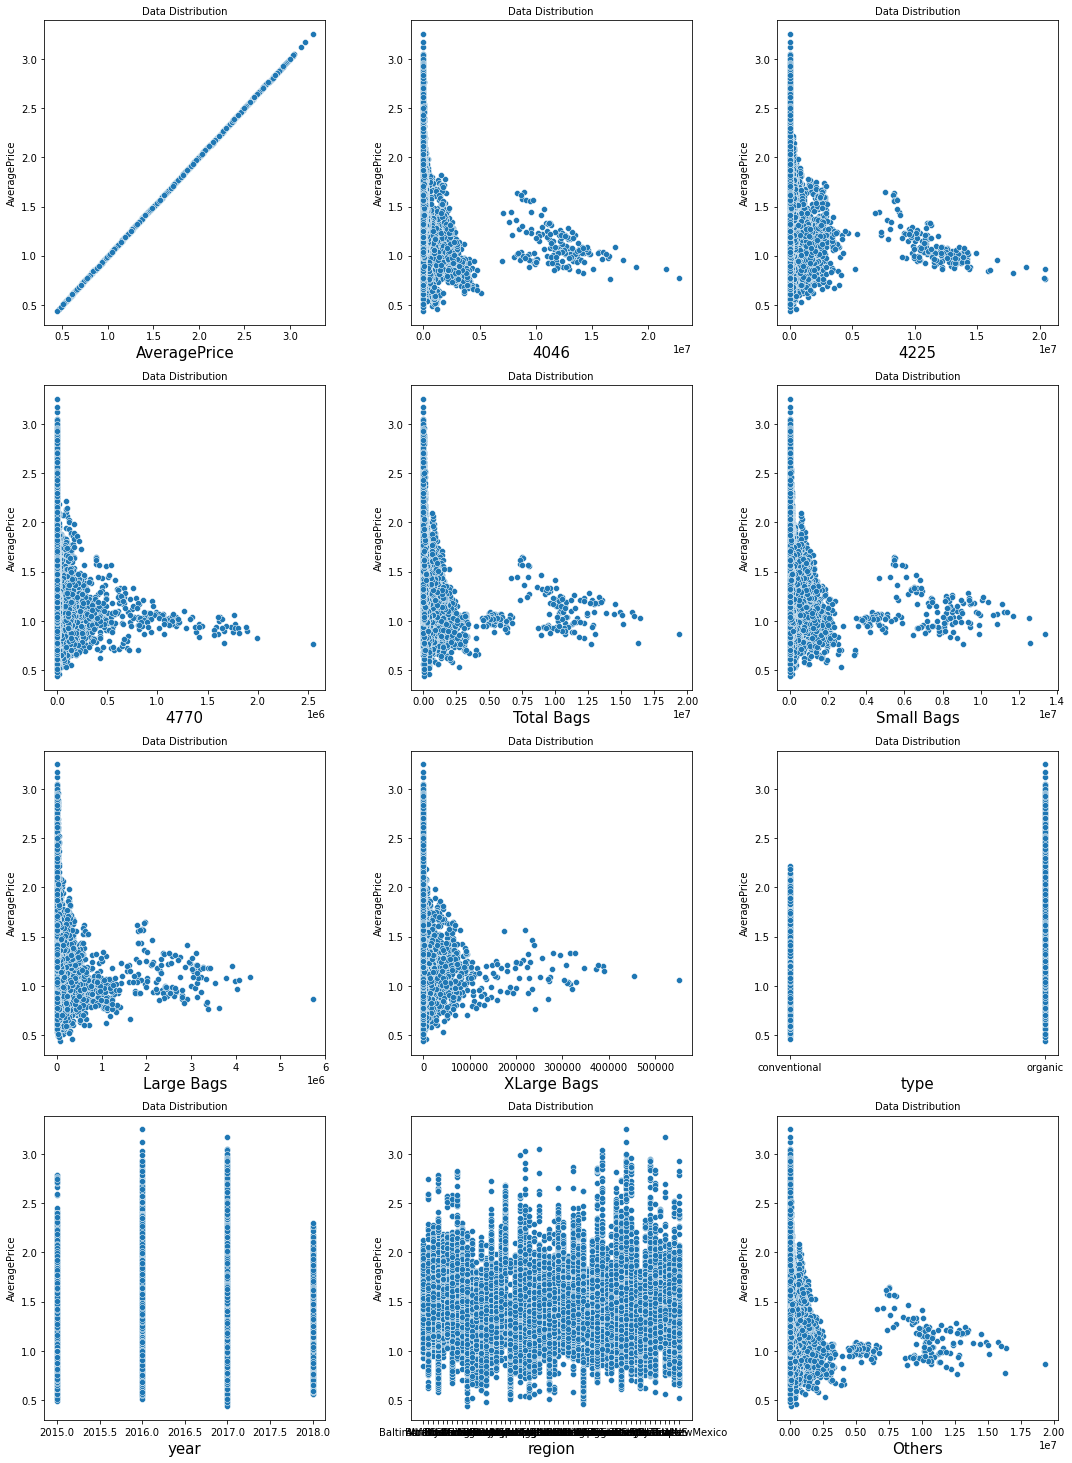

In [97]:
#Plotting scatter plot to see the relation of features with label

plt.figure(figsize = [15,25])
plotnumber = 1

for column in data:
    if plotnumber<=13:
        ax = plt.subplot(5,3,plotnumber)
        sns.scatterplot(x = data[column], y= data['AveragePrice'])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

Observations from the above plotting.

1 - Others, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags,	XLarge Bags have negative relation with Average Price.(With increase in these Average Price Decreases)

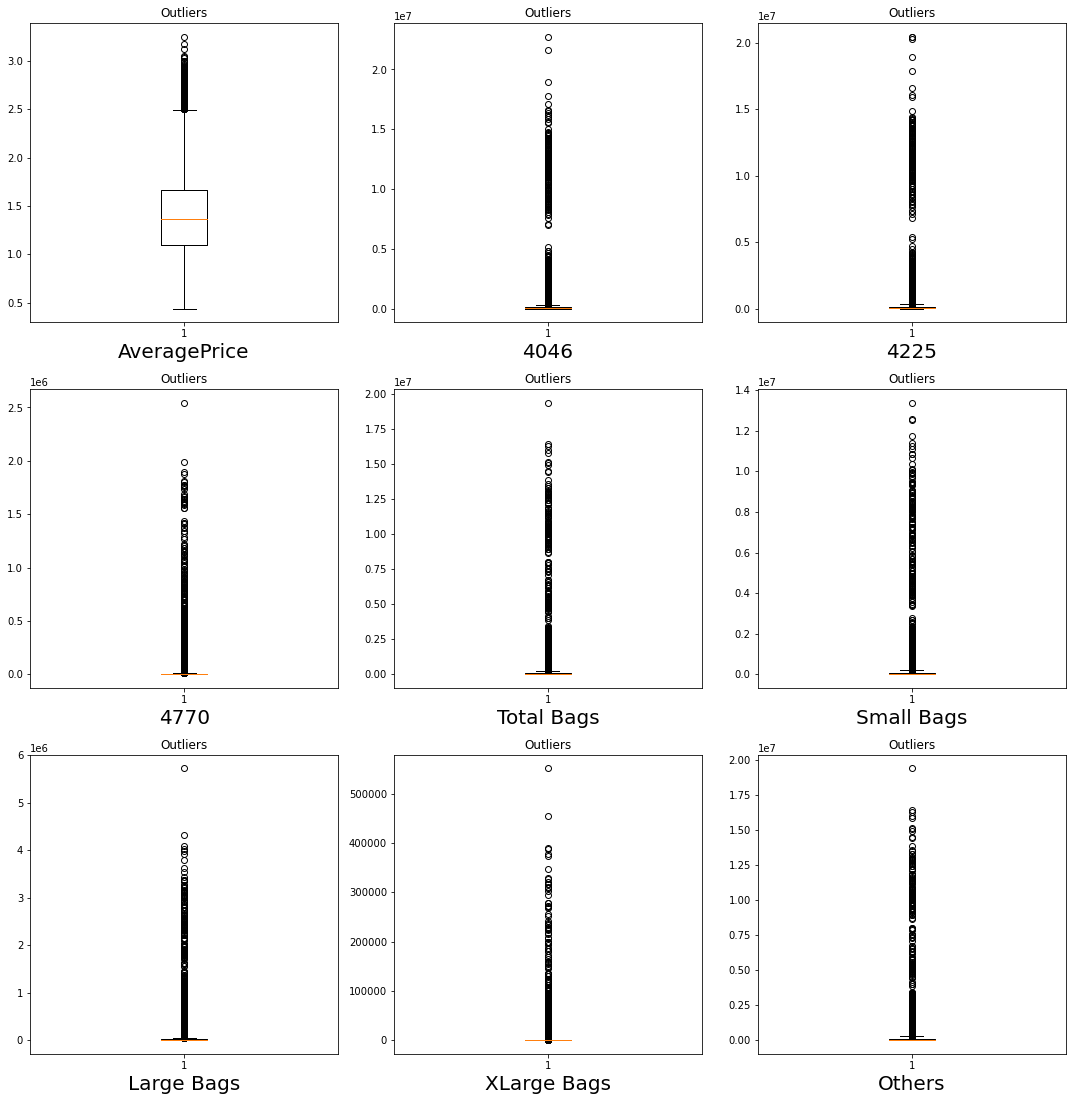

In [98]:
#Checking for outliers
plt.figure(figsize=(15,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=13:
        ax = plt.subplot(5,3,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column, fontsize=20)
        plt.title('Outliers')
    
    plotnumber +=1
plt.tight_layout()

With the help of above plotting we can see that there are too many outliers in every features.

In [99]:
#Now will check the collinearity among features with the help of heatmap.

In [100]:
corr_mat = data.corr()
corr_mat

,AveragePrice,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Others
AveragePrice,1.000000,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,-0.177087
4046,-0.208317,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,0.920056
4225,-0.172928,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,0.905787
4770,-0.179446,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,0.792314
Total Bags,-0.177088,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,1.000000
Small Bags,-0.174730,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,0.994335
Large Bags,-0.172940,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,0.943009
XLarge Bags,-0.117592,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,0.804232
year,0.093197,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,0.071555
Others,-0.177087,0.920056,0.905787,0.792314,1.000000,0.994335,0.943009,0.804232,0.071555,1.000000


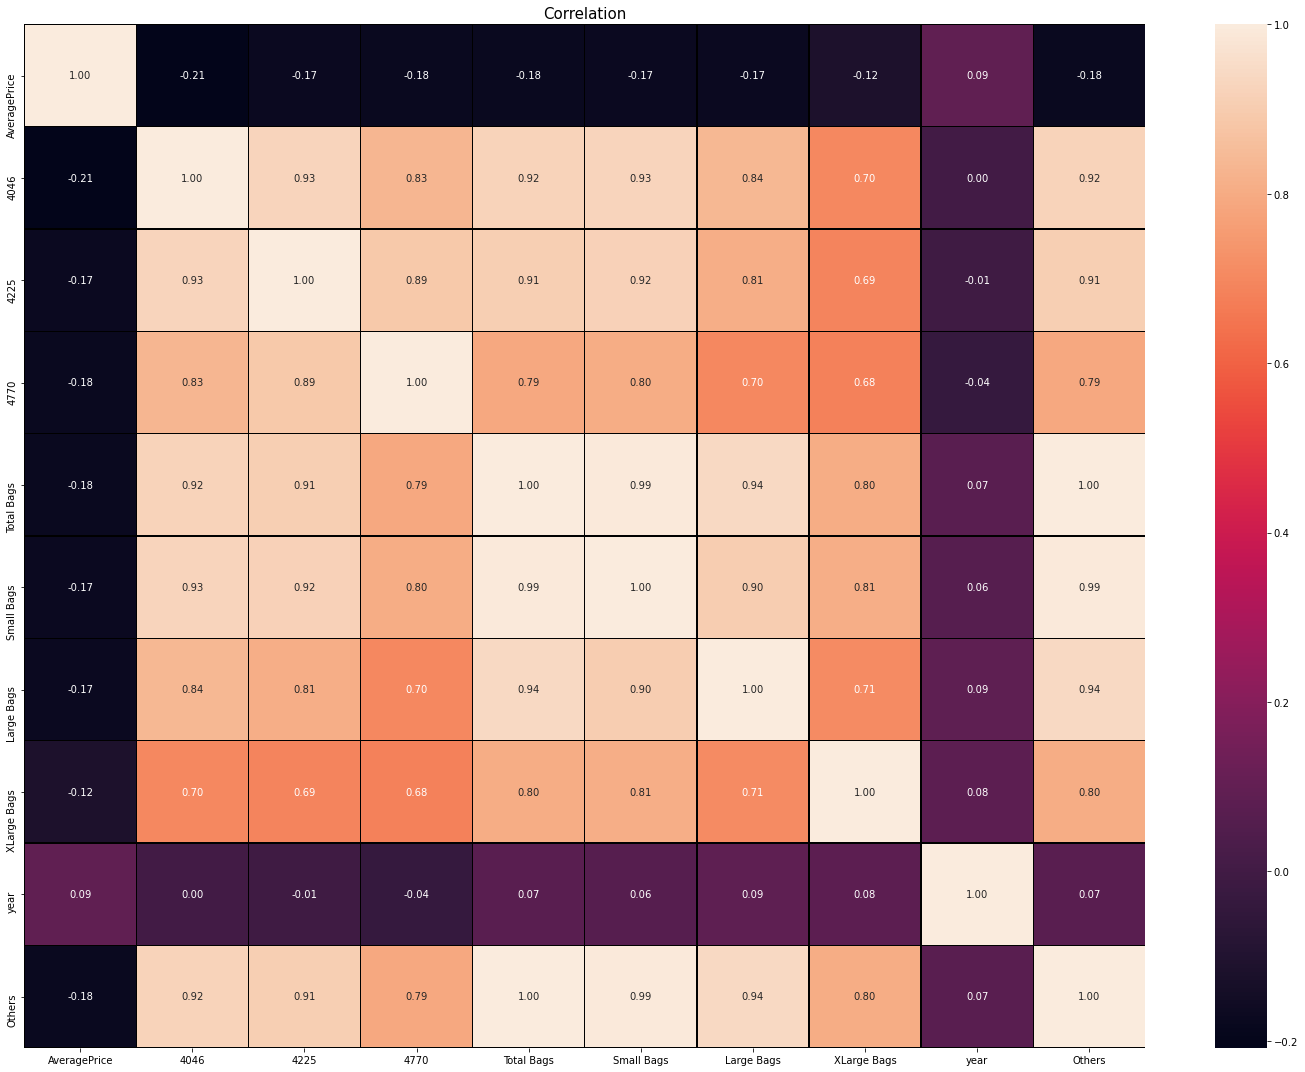

In [101]:
plt.figure(figsize = [20,15])
sns.heatmap(corr_mat,annot=True, linewidths=0.3,linecolor="black",fmt='.2f')
plt.title('Correlation', fontsize=15)
plt.tight_layout()

With the heatmap we found that Total Bags is highly co-related with every other feature and is negativily corelated with label AveragePrice.

AveragePrice has Minimum Correlation with the column : 4046 - ( - 0.21 %)

AveragePrice has Maximum Correlation with the column : XLarge Bags - (-0.12%)

#### We will remove the column Total Bags

1 - It includes the total of XLarge Bags, Large Bags and Small Bags.

2 -  It is very highly correlated with the feature Small Bags and Completely co-related with the newly created column Others

3 -  It has too many outliers, it is negatively co-related with Average Price and also has lot of skewness in the dataset.

### Data Cleaning :

In [102]:
#Dropping the Total Bags and Date column.

data.drop(['Total Bags'], axis = 1, inplace = True)

In [103]:
#Lets check the dataframe
data.shape

(18249, 11)

Now the dataset has 18249 rows and 11 columns only.

In [104]:
data.head(2)

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Others
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany,8696.87
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany,9505.56


In [105]:
x = data.drop(['AveragePrice'], axis =1)
y = data['AveragePrice']

In [106]:
#Lets first convert the string values for further processing of data with the help of label encoder.

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

x = x.astype('category')# Changing the datatypes into category first

for column in x.columns:
    x[column] = LE.fit_transform(x[column])

x.head(2)

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Others
0,4383,10872,1400,5782,1264,0,0,0,0,5861
1,3616,10213,1570,5972,1288,0,0,0,0,6094


In [107]:
x.shape

(18249, 10)

In [108]:
x['XLarge Bags'].value_counts()

0       12048
88         29
195        16
2          15
139        12
        ...  
906         1
2955        1
5016        1
922         1
2023        1
Name: XLarge Bags, Length: 5588, dtype: int64

Since the feature XLarge Bags has mostly zero in in we will replace it with mean as it is continuous.

In [109]:
x['XLarge Bags'] =  x['XLarge Bags'].replace(0,x['XLarge Bags'].mean())

In [110]:
x.shape

(18249, 10)

### Removing Outliers:

In [111]:
#Let us now remove outliers with the help of Z-score Method.

from scipy import stats

z = np.abs(stats.zscore(x))
print(z)
print('\n Row Numbers ==>', np.where(z>3)[0])
print('\n Column Numbers ==>', np.where(z>3)[1])

[[0.80622027 0.35885899 0.65812985 ... 1.22128204 1.7002522  0.60781106]
 [0.95279724 0.2335431  0.61558644 ... 1.22128204 1.7002522  0.56352929]
 [0.90024357 0.73765906 0.37884487 ... 1.22128204 1.7002522  0.63916939]
 ...
 [0.75443101 0.96161675 0.17071592 ... 1.97050371 1.70081131 0.56885071]
 [0.65333685 0.87148059 0.17021541 ... 1.97050371 1.70081131 0.49758176]
 [0.39286172 0.9758788  0.19465692 ... 1.97050371 1.70081131 0.46318262]]

 Row Numbers ==> [ 780  781  783  787  788  791  793  794  795  799  820  823 2340 2341
 2652 2653 2655 2659 2660 2663 2664 2665 2666 2667 2669 2671 2675 2679
 2692 2695 2699 3610 3611 3612 3613 3614 3615 3616 3617 3620 3621 3624
 3627 3630 3634 3635 3636 3639 4130 4131 4132 4133 4338 4339 4340 4341
 4652 4653 5165 5170 5172 5173 5174 5176 5177 5179 5194 5195 5196 5220
 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230 5231 5460 5461 5462
 5463 5464 5468 5469 5470 5471 5472 5473 5474 5475 5476 5477 5478 5479
 5480 5481 5482 5483 5484 5485 5486 5487 

In [112]:
#Storing the zcore > 3 in i

i = np.where(z>3)[0]

#Deleting the indexes having outliers stored in the above variable

x = x.drop(x.index[i])
y = y.drop(y.index[i])

In [114]:
y.shape

(17925,)

### Removing Skewness :

In [115]:
#Importing Power Transform to remove skewness from the entire dataset

from sklearn.preprocessing import power_transform

# Applying it on X to remove the skewness from features.

x = power_transform(x, method='yeo-johnson')

x

array([[-0.65287726,  0.46536671,  0.1274419 , ..., -1.30089043,
        -2.008329  , -0.4790613 ],
       [-0.82993508,  0.35379732,  0.17252622, ..., -1.30089043,
        -2.008329  , -0.43158659],
       [-0.76497182,  0.79023297,  0.36897981, ..., -1.30089043,
        -2.008329  , -0.51302485],
       ...,
       [-0.59315089, -0.87320581,  0.65984555, ...,  1.70426326,
         1.55812495, -0.43726243],
       [-0.48018381, -0.76522734,  0.65963654, ...,  1.70426326,
         1.55812495, -0.36188356],
       [-0.20739851, -0.89066326,  0.4836713 , ...,  1.70426326,
         1.55812495, -0.32597575]])

### Model Building :

In [116]:
# Import Standard Scaler to scale the data

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [119]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [120]:
#Importing Train Test Split to train and test the model

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
y.shape

(17925,)

In [123]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state=300)

In [124]:
#Now Model Initiating and Training

In [125]:
LR = LinearRegression()
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
SVR = SVR()

In [126]:
LR.fit(x_train,y_train)
DT.fit(x_train,y_train)
RF.fit(x_train,y_train)
SVR.fit(x_train,y_train)
print("All Models Trained")

All Models Trained


In [127]:
#Prediction Scores for each trained model

In [128]:
LR.score(x_test,y_test)

0.5180898844904032

In [129]:
DT.score(x_test,y_test)

0.6843344894231946

In [130]:
RF.score(x_test,y_test)

0.8436588072103948

In [131]:
SVR.score(x_test,y_test)

0.7023645774178973

With the above adjusted r2 score of all the models we see that RandomForestRegressor is giving us the best prediction Now will check the mean squared error of each trained model.

In [134]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [135]:
y_pred1=LR.predict(x_test)
y_pred2 =DT.predict(x_test)
y_pred3=RF.predict(x_test)
y_pred4=SVR.predict(x_test)

In [136]:
mean_squared_error(y_test,y_pred1) # For the linear regression model

0.07961624672134524

In [137]:
mean_squared_error(y_test,y_pred2) #For the Decision Tree Regressor Model

0.0521510181311018

In [138]:
mean_squared_error(y_test,y_pred3) # For the random forest regressor model

0.025829088407252437

In [139]:
mean_squared_error(y_test,y_pred4) #For support vector regressor model.

0.0491722719126792

It has become quite clear with the above scores that RandomForestRegressor is best fit for this model as the mean_squared_error of it is least as compared with all others models

### Cross Validation:

In [140]:
#Doing Cross Validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(RF,x_train,y_train,cv=5)

cvs.mean()

0.8350558795649226

There is not much difference hence we can say that the model is neither overfitting nor underfitting.

### HyperParameter Tuning:

In [141]:
##Doing hyper parameter tuning for it

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
params = {'n_estimators':[140,160],
         'max_depth':[24,32],
         'min_samples_leaf': [2,8],
         'min_samples_split': [2,3]}

In [144]:
grid = GridSearchCV(RF, param_grid= params, cv= 3, n_jobs=-1)

In [145]:
grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [24, 32], 'min_samples_leaf': [2, 8],
                         'min_samples_split': [2, 3],
                         'n_estimators': [140, 160]})

In [146]:
print('Best Estimators == > \n', grid.best_params_)

Best Estimators == > 
 {'max_depth': 32, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 140}


In [147]:
#Reinstantiating classifier with the best parameters

clf = grid.best_estimator_

In [148]:
clf.fit(x_train, y_train)

RandomForestRegressor(max_depth=32, min_samples_leaf=2, min_samples_split=3,
                      n_estimators=140)

In [149]:
y_pred =  clf.predict(x_test)

In [150]:
mean_squared_error(y_test,y_pred)

0.026260613633442603

In [151]:
clf.score(x_test,y_test)

0.8410468230970711

In [152]:
mean_absolute_error(y_test,y_pred)

0.10993095035673188

In [153]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.162051268533889

### Visualising it on Graph:

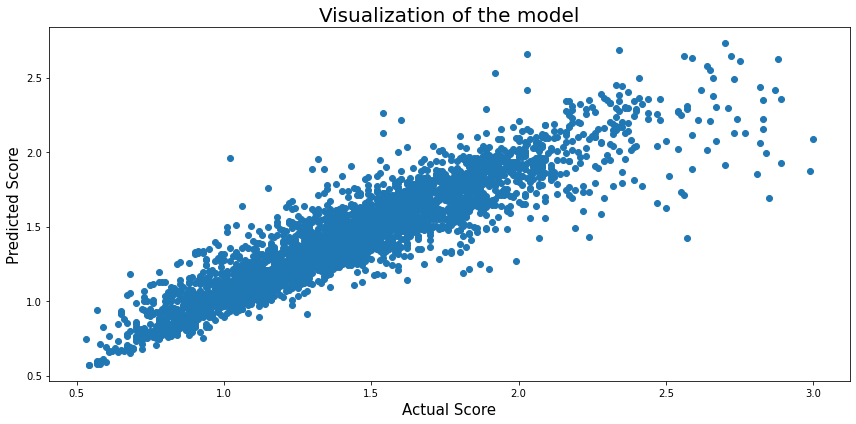

In [154]:
plt.figure(figsize = [12,6])
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score', fontsize=15)
plt.ylabel('Predicted Score',fontsize=15)
plt.title('Visualization of the model', fontsize = 20)
plt.tight_layout()

### Saving the model:

In [270]:
import joblib

In [271]:
filename = 'Avacado_RegressionModel.sav'
joblib.dump(clf, filename)

['Avacado_RegressionModel.sav']